Integrantes
Ferney Alonso Montoya Gallo CC: 1007291652
Juan camilo avendaño rodriguez: 1193585383

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [36]:
data= pd.read_csv("/content/usuarios-twitter.csv")
# Columnas del dataframe
data.info()

# Ejemplo de los datos
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   usuario    140 non-null    object 
 1   op         140 non-null    float64
 2   co         140 non-null    float64
 3   ex         140 non-null    float64
 4   ag         140 non-null    float64
 5   ne         140 non-null    float64
 6   wordcount  140 non-null    float64
 7   categoria  140 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB


,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


<ipython-input-37-5d4659e5f4ec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr(method='pearson')


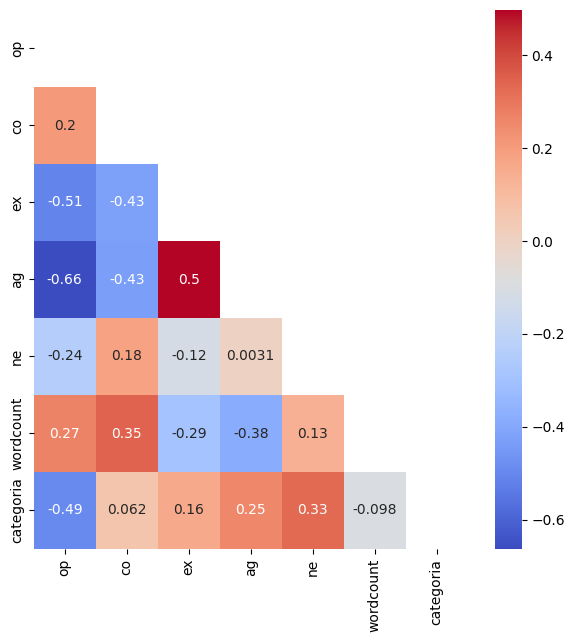

In [37]:
# definimos matriz de correlacion
corr = data.corr(method='pearson')
# Creamos una máscara que filtre la diagonal superior de la matriz (para ignorar duplicados)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
#generamos hotmap con seaborn
plt.figure(figsize=(7,7))
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=True)
plt.show()

In [38]:

print(data.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

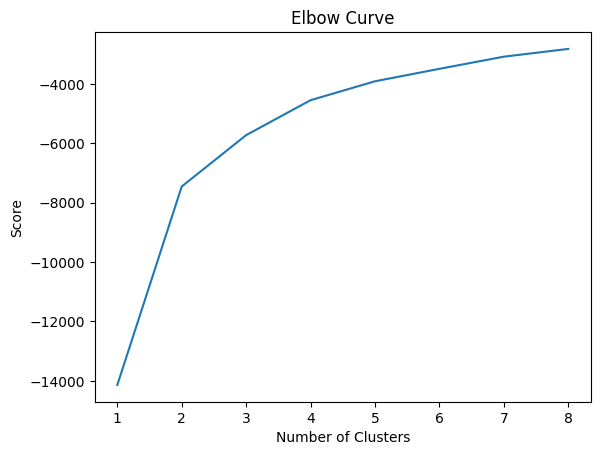

In [39]:
X = data[['co', 'ag', 'ne']]

Nc = range(1, 9)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [40]:
X = np.array(data[["co","ag","ne"]])
y = np.array(data['categoria'])
X.shape

(140, 3)

In [78]:
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[22.83471496 19.41766536]
 [19.0315352  32.142595  ]
 [32.38881195 15.29261175]]


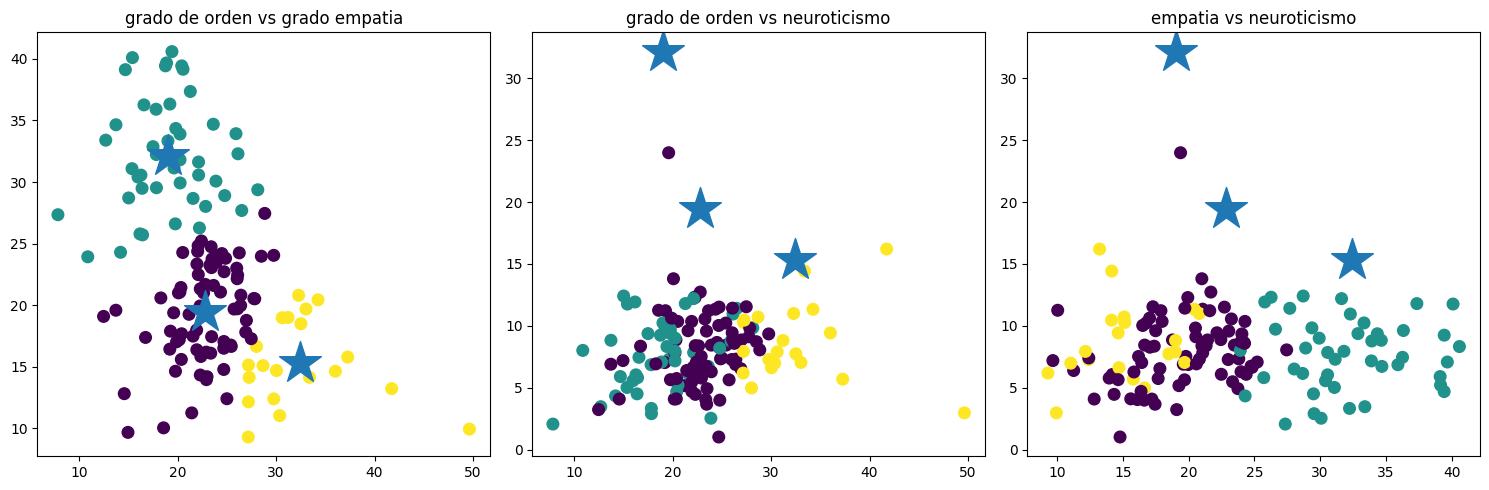

In [83]:
# Hacemos una proyección a 2D con los diversos ejes
f1 = data['co'].values
f2 = data['ag'].values
f3 = data['ne'].values

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Creamos una fila de 3 subplots

# Gráfico 1
axs[0].scatter(f1, f2, c=kmeans.labels_, s=70)
axs[0].scatter(centroids[:, 0], centroids[:, 1], marker='*', s=1000)
axs[0].set_title('grado de orden vs grado empatia')

# Gráfico 2
axs[1].scatter(f1, f3, c=kmeans.labels_, s=70)
axs[1].scatter(centroids[:, 0], centroids[:, 1], marker='*', s=1000)
axs[1].set_title('grado de orden vs neuroticismo')

# Gráfico 3
axs[2].scatter(f2, f3, c=kmeans.labels_, s=70)
axs[2].scatter(centroids[:, 0], centroids[:, 1], marker='*', s=1000)
axs[2].set_title('empatia vs neuroticismo')

plt.tight_layout()  # Ajusta automáticamente los subplots para evitar superposiciones
plt.show()

podemos inferir gracias a la primera grafica que los mas ordenados tienen menor empatia en el grupo amarillo, mientras que los de grupo  morado tienen una empatia media y organizacion media, los azules son muy empaticos pero tiene menor orden, la variable de neuroticismo daña las graficas, pero en una neuva corrida indico que si aporta informacion, la variable aporta informacion de una menra que no podemos visualizar

F3